<a href="https://colab.research.google.com/github/poandpo/project-/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,510 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [1]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


#기본 데이터 전처리

In [2]:
import pandas as pd

df= pd.read_csv('vgames2.csv', index_col=0) #df로 파일 불러오는데 인덱스를 숫자 있는 열(0행)로 지정
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df.isnull().sum() # 결측치 확인
df['Year']=df['Year'].fillna(0).replace('N/A',0).astype(int) # Year 피쳐에 결측지 0으로 대체하고 N/A를 0으로 대체하고 정수형 타입으로 변환
df[['Genre','Publisher' ]]=df[['Genre','Publisher' ]].fillna('unknown') #Genre,Publisher 피쳐의 결측치를 unknown으로 대체
#df['Platform']=df['Platform'].replace('챕','e') 



In [4]:
def value_to_float(x):
    if 'K' in x:
       return float(x.replace('K', '')) * 0.001
    elif 'M' in x: 
       return float(x.replace('M', ''))
    else:
       return float(x)

df['NA_Sales']=df['NA_Sales'].apply(value_to_float)
df['EU_Sales']=df['EU_Sales'].apply(value_to_float)
df['JP_Sales']=df['JP_Sales'].apply(value_to_float)
df['Other_Sales']=df['Other_Sales'].apply(value_to_float)
#출고량 피쳐에서 'M'을 빼고 정수형으로 바꾸고, 'K'를 빼고 0,0001를 곱하여 단위를 맞춤

In [5]:
df.dtypes #타입 잘 바뀌었는지 확인

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [6]:
def value_to_year(x):
   if x in range(1,20):
      return x + 2000  
   elif x in range(80,100):
      return x + 1900   
   else :   
      return x

df['Year']=df['Year'].apply(value_to_year) # 97이나 9같은 한 두자리 숫자를 1997,2009으로 바꿈

In [7]:
df['Year'].iloc[81] # 잘 바뀌었는지 확인

1997

In [8]:
df['Total_sales']= df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df 
# 모든 지역 출고량의 합 피쳐를 만든

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


#지역에 따라서 선호하는 게임 장르가 다를까
1. 장르별로 모아서 각 나라의 출고량의 총합들 계산
2. 총합 시각화

In [9]:
df['Genre'].value_counts(dropna = False) # 장르별 빈도 

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
unknown           50
Name: Genre, dtype: int64

In [10]:
df_g= df.sort_values(by=['Genre'], axis=0).reset_index(drop=True)[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales' ]]


In [11]:
df_g

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.00,0.00,0.11,0.00
2,Action,0.29,0.28,0.00,0.06
3,Action,0.04,0.02,0.00,0.00
4,Action,0.16,0.05,0.00,0.02
...,...,...,...,...,...
16593,unknown,0.46,0.03,0.00,0.01
16594,unknown,5.17,4.05,4.34,0.79
16595,unknown,0.13,0.05,0.00,0.00
16596,unknown,0.00,0.02,0.00,0.00


In [12]:
a=df_g[df_g['Genre'].isin(['Action'])].sum()
b=df_g[df_g['Genre'].isin(['Sports'])].sum()
c=df_g[df_g['Genre'].isin(['Misc'])].sum()
d=df_g[df_g['Genre'].isin(['Role-Playing'])].sum()
e=df_g[df_g['Genre'].isin(['Shooter'])].sum()
f=df_g[df_g['Genre'].isin(['Adventure'])].sum()
g=df_g[df_g['Genre'].isin(['Racing'])].sum()
h=df_g[df_g['Genre'].isin(['Platform'])].sum()
i=df_g[df_g['Genre'].isin(['Simulation'])].sum()
j=df_g[df_g['Genre'].isin(['Fighting'])].sum()
k=df_g[df_g['Genre'].isin(['Strategy'])].sum()
l=df_g[df_g['Genre'].isin(['Puzzle'])].sum()


In [13]:
df_g_to=pd.concat([a,b,c,d,e,f,g,h,i,j,k,l], axis=1) # 평균 구한것을 합쳐주기
df_g_to.columns=['Action','Sport','Misc','Role-Playing','Shooter','Adventure','Racing','Platform','Simulation','Fighting','Strategy','Puzzle']
# 컬럼명을 변경
df_g_to=df_g_to.T.drop(columns='Genre') #행과 열 전환
df_g_to

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Action,874.81,522.16,157.9,186.45
Sport,680.52,376.48,135.37,134.67
Misc,408.05,212.36,105.27,74.04
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.28,102.65
Adventure,105.66,64.05,51.95,16.81
Racing,357.19,237.1,56.4,77.1
Platform,446.44,201.61,130.65,51.53
Simulation,182.96,113.35,63.7,31.48
Fighting,223.2,101.22,87.34,36.64


In [14]:
df_g_to.iloc[:,1]

Action          522.16
Sport           376.48
Misc            212.36
Role-Playing    183.58
Shooter         313.05
Adventure        64.05
Racing           237.1
Platform        201.61
Simulation      113.35
Fighting        101.22
Strategy         45.32
Puzzle           50.73
Name: EU_Sales, dtype: object

In [15]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')  

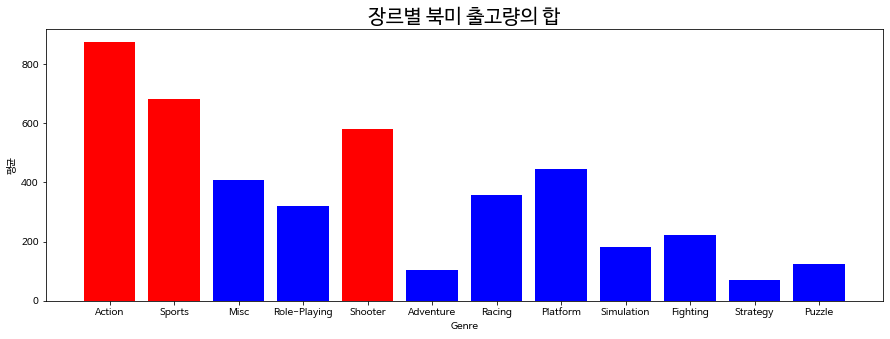

In [16]:
area_category=['Action','Sports','Misc','Role-Playing','Shooter','Adventure','Racing','Platform','Simulation','Fighting','Strategy','Puzzle']

plt.figure(figsize=(15,5))

xtick_label_position = list(range(len(area_category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, area_category)
colors=['r','r','b','b','r','b','b','b','b','b','b','b']

plt.bar(xtick_label_position, df_g_to.iloc[:,0], color=colors)

plt.title('장르별 북미 출고량의 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Genre') ## x축 라벨 출력
plt.ylabel('평균') ## y축 라벨 출력
plt.show()

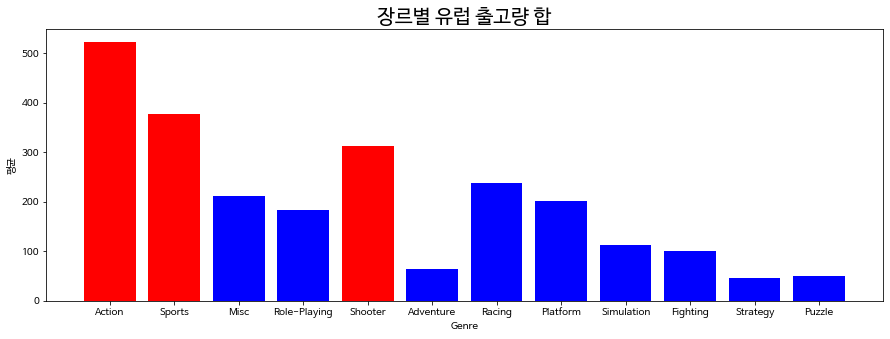

In [17]:


plt.figure(figsize=(15,5))

xtick_label_position = list(range(len(area_category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, area_category)
colors=['r','r','b','b','r','b','b','b','b','b','b','b']

plt.bar(xtick_label_position, df_g_to.iloc[:,1], color=colors)

plt.title('장르별 유럽 출고량 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Genre') ## x축 라벨 출력
plt.ylabel('평균') ## y축 라벨 출력
plt.show()

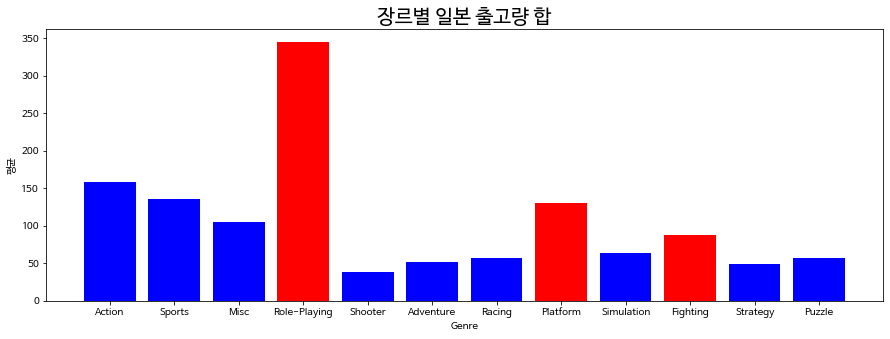

In [18]:


plt.figure(figsize=(15,5))

xtick_label_position = list(range(len(area_category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, area_category)
colors=['b','b','b','r','b','b','b','r','b','r','b','b']

plt.bar(xtick_label_position, df_g_to.iloc[:,2], color=colors)

plt.title('장르별 일본 출고량 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Genre') ## x축 라벨 출력
plt.ylabel('평균') ## y축 라벨 출력
plt.show()

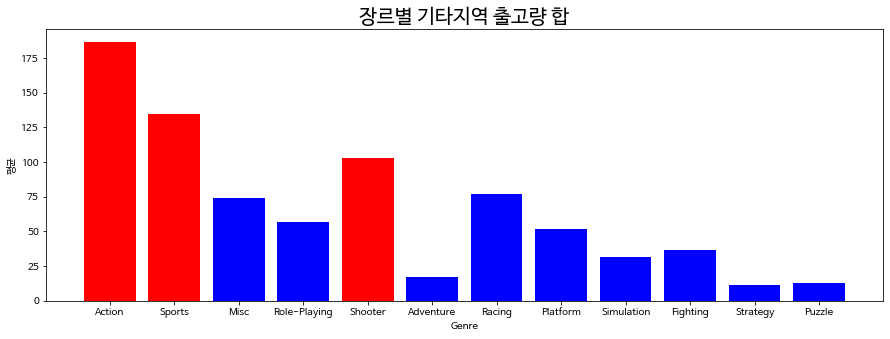

In [19]:


plt.figure(figsize=(15,5))

xtick_label_position = list(range(len(area_category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, area_category)
colors=['r','r','b','b','r','b','b','b','b','b','b','b']

plt.bar(xtick_label_position, df_g_to.iloc[:,3], color=colors)

plt.title('장르별 기타지역 출고량 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Genre') ## x축 라벨 출력
plt.ylabel('평균') ## y축 라벨 출력
plt.show()

히트맵으로 전체적으로 비교

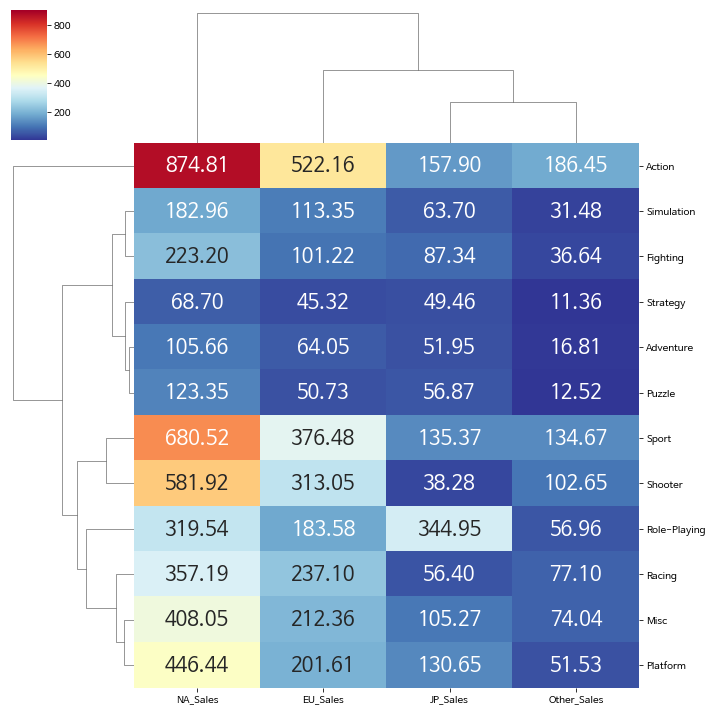

In [42]:
import seaborn as sns
sns.clustermap(df_g_to,
               annot = True, annot_kws={'size':20},
               fmt = '.2f',
               cmap='RdYlBu_r',
              vmax= 900) 

북미와 유럽은 action, sport, shooter을 선호하는 반면,
일본은 Role-playing이 압도적으로 선호하는 것을 알 수 있다.

**가설1: 지역별 출고량의 총합들의 비율은 유사하다**

In [ ]:
df_g_to_sum=df_g_to.sum()
df_g_to_sum

In [26]:
from scipy.stats import chisquare

chi1 = chisquare(df_g_to_sum, axis=None)
chi1

Power_divergenceResult(statistic=3429.0829413901647, pvalue=0.0)

Pvalue가 0.05로 귀무가설을 기각될 가능성이 높으므로 즉, 지역별 출고량의 총합들은 유사하지 않다.

**가설2: 지역별 출고량과 장르가 독립적이다(연관이 없다)**

In [27]:
df_g_to=df_g_to.astype('category')

In [28]:
from scipy.stats import chi2_contingency

chi2_val, p, dof, expected= chi2_contingency(df_g_to, correction=False) #Two-sample 카이제곱 검증함
print('Chi^2 값',': ',chi2_val.round(2),"\n")
if(p<0.05) : 
    print('귀무가설 H0를 기각한다.', 'p value:', p.round(2),"\n")
else :
    print('귀무가설 H0를 기각하지 못한다.', 'p value:', p.round(2),"\n")


Chi^2 값 :  696.8 

귀무가설 H0를 기각한다. p value: 0.0 



Pvalue가 0.05로 귀무가설을 기각될 가능성이 높으므로 즉, 장르와 지역별 출고량이 독립적이지 않다. 즉, 둘은 연관이 되어있음을 알수 있다

##총정리

시각화된 자료를 통해서 미국과 유럽은 비슷하나 일본은 매우 다르고, 가설 검증을 통해서 지역별 출고량과 장르가 연관이 되어있다. 

**즉, 지역에 따라서 선호하는 게임의 장르가 다르다는 것을 알 수 있다.**

#연도별 게임의 트렌드가 있을까?

In [ ]:
df['Year'].value_counts(dropna = False) 

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     346
2016     344
1999     338
1997     289
0        274
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [ ]:
df_Y=df.sort_values(by=['Year'], axis=0) #year피쳐 기준으로 정렬
df_Y=df_Y.sort_values(by=['Platform'], axis=0)
df_Y

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
4618,Hangman,2600,0,Puzzle,Atari,0.35,0.02,0.00,0.00,0.37
6123,Berzerk,2600,1981,Shooter,Atari,0.68,0.04,0.00,0.01,0.73
15886,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4.50
821,Fantastic Voyage,2600,1981,Action,20th Century Fox Video Games,0.32,0.02,0.00,0.00,0.34
13507,Raiders of the Lost Ark,2600,1981,Action,Atari,0.46,0.03,0.00,0.01,0.50
...,...,...,...,...,...,...,...,...,...,...
5610,Forza Motorsport 6,XOne,2015,Racing,Microsoft Game Studios,0.69,0.89,0.03,0.14,1.75
3595,Middle-Earth: Shadow of Mordor,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.72,0.50,0.01,0.10,1.33
6769,Transformer: Rise of the Dark Spark,XOne,2014,Action,Activision,0.06,0.03,0.00,0.01,0.10
1731,Just Dance: Disney Party 2,XOne,2015,Action,Ubisoft,0.05,0.01,0.00,0.01,0.07


## 1.연도와 장르 선호도
- 갯수의 합

In [ ]:
eighty =range(1980,1990)

e_s=df_Y[df_Y['Year'].isin(eighty)].reset_index(drop=True) #205
A=e_s['Genre'].value_counts(dropna = False) 

nighty=range(1990,2000)

n_s=df_Y[df_Y['Year'].isin(nighty)].reset_index(drop=True) #1769
B=n_s['Genre'].value_counts(dropna = False)
 
noughties_1=range(2000,2010)

nou_s1=df_Y[df_Y['Year'].isin(noughties_1)].reset_index(drop=True) #4136
C=nou_s1['Genre'].value_counts(dropna = False)

#noughties_2=range(2006,2010)

#nou_s2=df_Y[df_Y['Year'].isin(noughties_2)].reset_index(drop=True) #5069
#D=nou_s2['Genre'].value_counts(dropna = False)

tens=range(2010,2021)
t1=df_Y[df_Y['Year'].isin(tens)].reset_index(drop=True) #5145
E=t1['Genre'].value_counts(dropna = False)

In [ ]:
df_Y_v=pd.concat([A,B,C,E], axis=1)
df_Y_v.columns=['80s','90s','2000s','2010s']
df_Y_v_1=df_Y_v.drop(labels = "unknown", axis = 0).transpose().reset_index()

df_Y_v_1


,index,Action,Platform,Shooter,Sports,Puzzle,Role-Playing,Misc,Racing,Fighting,Simulation,Adventure,Strategy
0,80s,66.0,33.0,30.0,22.0,19.0,9.0,8.0,8.0,4.0,3.0,2.0,NaN
1,90s,161.0,125.0,137.0,304.0,71.0,171.0,115.0,181.0,193.0,86.0,97.0,123.0
2,2000s,1579.0,564.0,717.0,1404.0,361.0,729.0,1021.0,797.0,442.0,551.0,632.0,378.0
3,2010s,1436.0,151.0,395.0,569.0,116.0,557.0,561.0,234.0,196.0,209.0,539.0,168.0


Text(0.5, 0, 'Year')

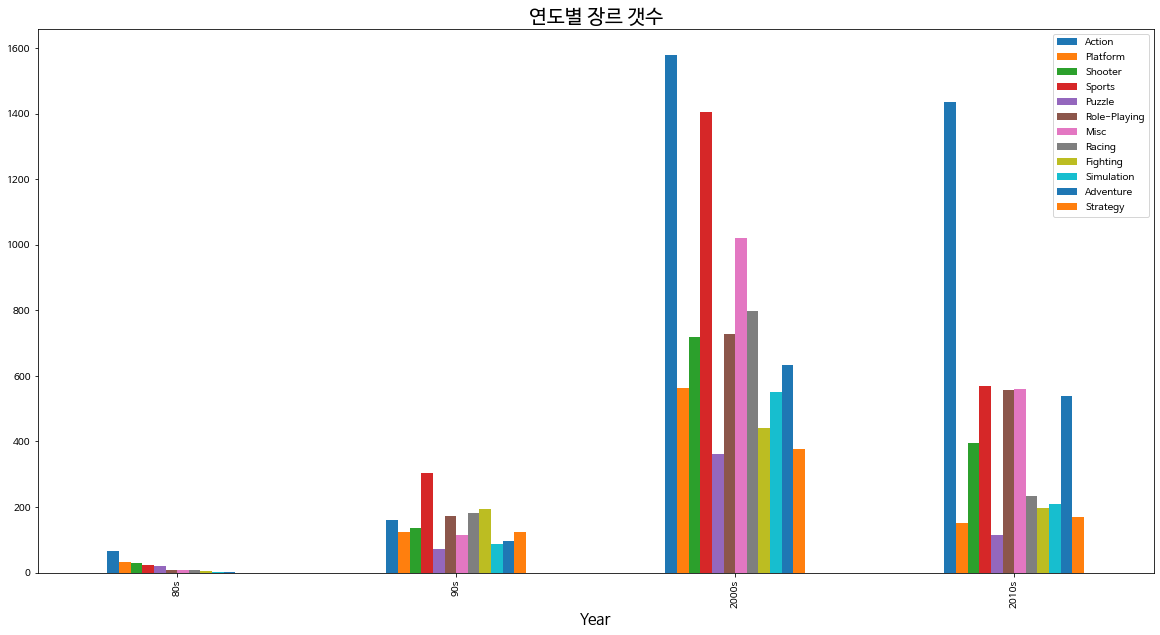

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

area_category=['Action',	'Platform',	'Shooter',	'Sports',	'Puzzle',	'Role-Playing','Misc',	'Racing',	'Fighting',	'Simulation',	'Adventure',	'Strategy']

df_Y_v_1.plot(x= 'index', y=area_category, kind="bar",figsize=(20,10)) 

plt.title('연도별 장르 갯수',fontsize=20) ## 타이틀 출력
plt.xlabel('Year',fontsize=15) ## x축 라벨 출력
#plt.ylabel('') ## y축 라벨 출력

- 연도별 장르 출고량의 합

In [ ]:
id= n_s.groupby(by=['Genre'],as_index=False).sum()['Genre']
e_s_1=e_s.groupby(by=['Genre'],as_index=False).sum()['Total_sales']
n_s_1=n_s.groupby(by=['Genre'],as_index=False).sum()['Total_sales']
nou_s1_1=nou_s1.groupby(by=['Genre'],as_index=False).sum()['Total_sales']
t1_1=t1.groupby(by=['Genre'],as_index=False).sum()['Total_sales']

df_Y_s=pd.concat([id,e_s_1,n_s_1,nou_s1_1,t1_1], axis=1)
df_Y_s.columns=['Year','80s','90s','2000s','2010s']
df_Y_s_=df_Y_s.transpose().reset_index()
df_Y_s_= df_Y_s_.rename(columns=df_Y_s_.iloc[0]).drop(df_Y_s_.index[0]).drop(labels = "unknown", axis = 1)
df_Y_s_

,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
1,80s,51.1,4.78,7.24,8.44,122.26,62.75,12.1,15.25,59.77,0.51,31.78,0.5
2,90s,139.15,44.8,123.51,63.43,208.87,38.94,148.81,182.77,68.89,52.04,146.47,57.51
3,2000s,853.13,123.77,231.26,486.24,376.04,117.86,438,412.2,433.43,265.64,802.81,79.62
4,2010s,669.64,60.87,81.53,229.3,120.75,21.19,123.65,291.3,462.64,71.27,324.28,35.81


Text(0.5, 0, 'Year')

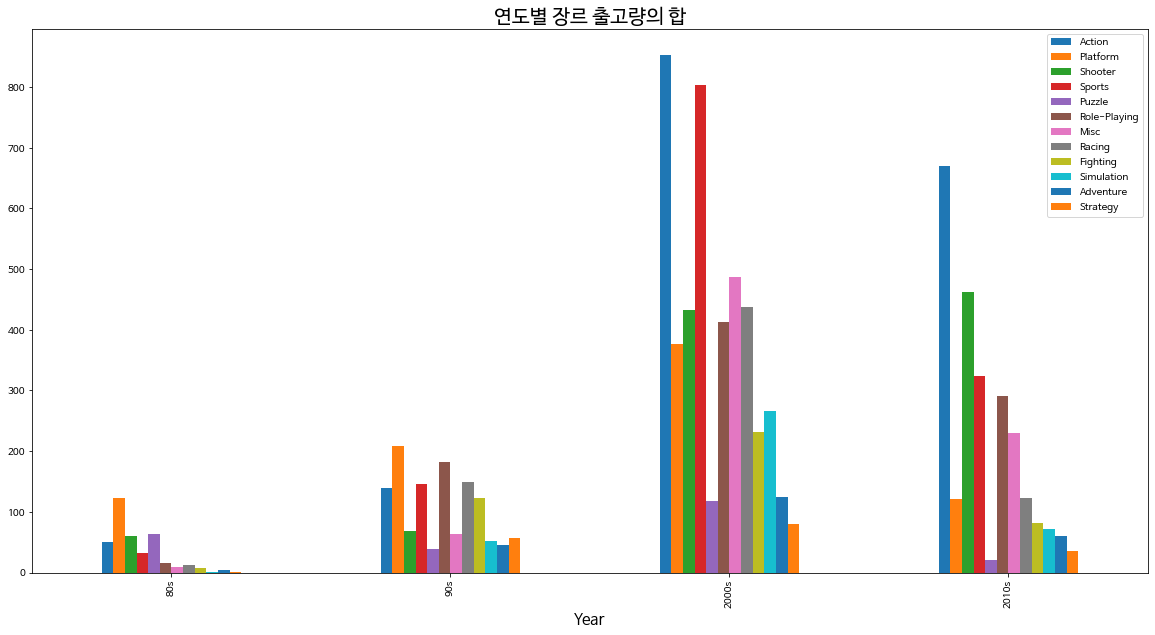

In [ ]:
import seaborn as sns

df_Y_s_.plot(x= 'Year', y=area_category, kind="bar",figsize=(20,10)) 

plt.title('연도별 장르 출고량의 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Year',fontsize=15) ## x축 라벨 출력
#plt.ylabel('') ## y축 라벨 출력

###최근 10년 장르 출고량의 합


In [ ]:
df_Y_s=df_Y_s.set_index('Year')

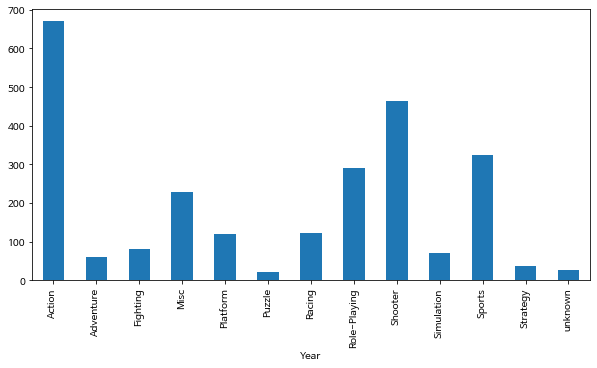

In [ ]:
plt.figure(figsize=(10,5))
df_Y_s['2010s'].plot.bar()

## 연도와 플렛폼 선호도

In [ ]:
id2_2_=df_Y.groupby(by=['Platform'],as_index=False).sum()[['Platform','Total_sales']].set_index(keys='Platform')
e_s_=e_s.groupby(by=['Platform'],as_index=False).sum()[['Platform','Total_sales']].set_index(keys='Platform')
n_s_=n_s.groupby(by=['Platform'],as_index=False).sum()[['Platform','Total_sales']].set_index(keys='Platform')
nou_s1_=nou_s1.groupby(by=['Platform'],as_index=False).sum()[['Platform','Total_sales']].set_index(keys='Platform')
t1_=t1.groupby(by=['Platform'],as_index=False).sum()[['Platform','Total_sales']].set_index(keys='Platform')

In [ ]:
id2_2_2= id2_2_.copy()
e_s_2=e_s_.copy()
n_s_2=n_s_.copy()
nou_s1_2=nou_s1_.copy()
t1_2=t1_.copy()

id2_2_2=id2_2_2.add_suffix('_')
e_s_2=e_s_2.add_suffix('_1980')
n_s_2=n_s_2.add_suffix('_1990')
nou_s1_2=nou_s1_2.add_suffix('_2000')
t1_2=t1_2.add_suffix('_2010')

result= id2_2_2.join([e_s_2,n_s_2,nou_s1_2,t1_2])
result2=result.drop(labels='Total_sales_', axis=1).fillna(0).reset_index(drop=False)

re=result2.T.reset_index()
re2=re.rename(columns=re.iloc[0]).drop(re.index[0])
re2

,Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
1,Total_sales_1980,86.48,0,0,0,0.02,66.4,0,0,0,0,0,223.51,0,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Total_sales_1990,0,0.1,0,8.54,0,159.03,0,0,28.35,0.04,180.71,27.54,1.44,49.96,0.03,586.88,0,0,0,0,0,33.59,1.86,200.04,0.16,0.46,0,0,0,0,0
3,Total_sales_2000,0,0,0,7.41,688.22,28.8,312.88,196.73,0,0,37.3,0,0,84.34,0,140.57,1227.47,347.08,0,227.3,0,0,0,0,0,0.96,676.95,0,412.62,251.57,0
4,Total_sales_2010,0,0,246.18,0,129.7,0,0,0,0,0,0,0,0,119.87,0,0,6.09,602.31,278.16,64.36,61.64,0,0,0,0,0,232.25,81.79,556.69,0,141.1


Text(0.5, 0, 'Year')

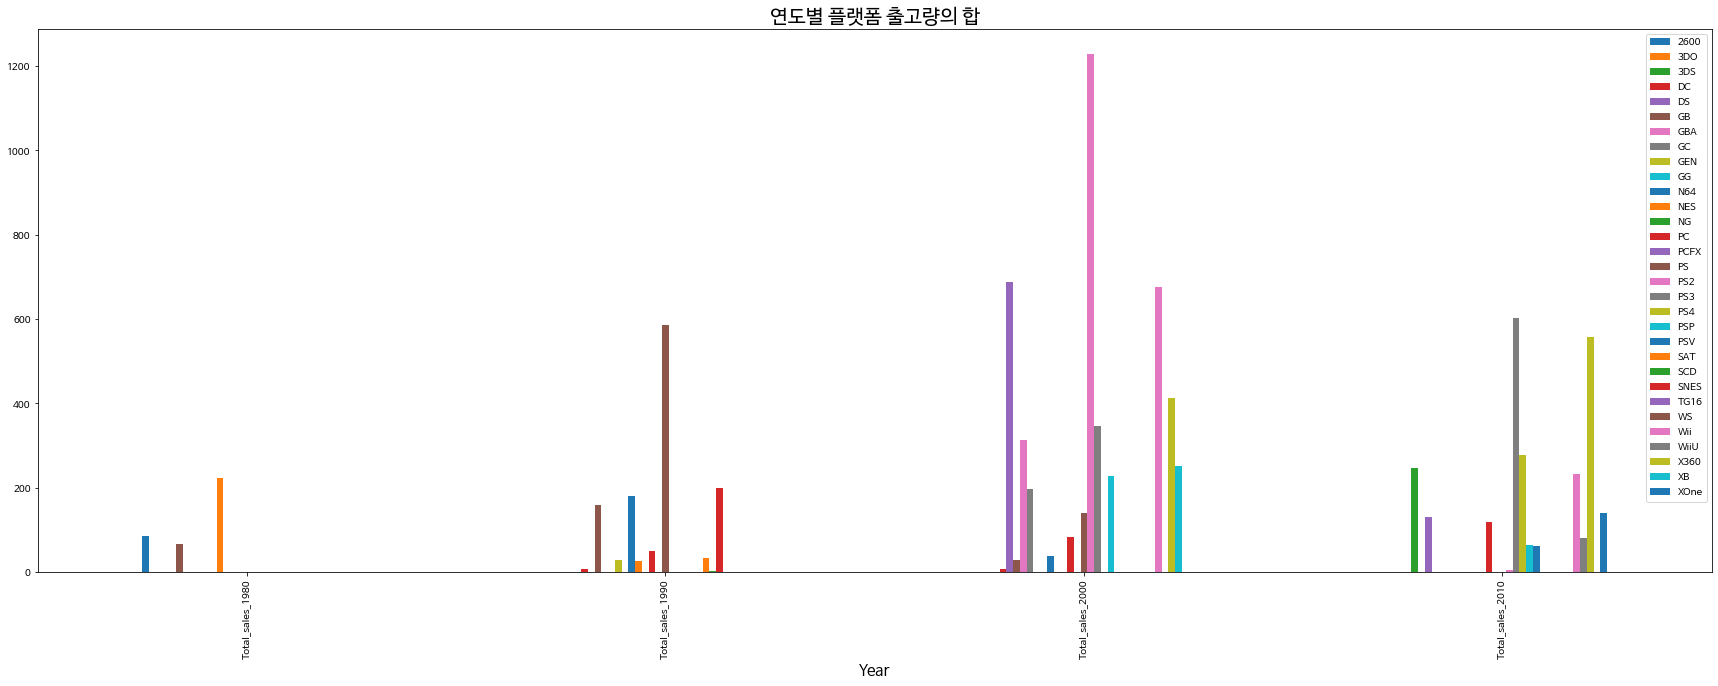

In [ ]:
import seaborn as sns

p_category=['2600',	'3DO',	'3DS',	'DC',	'DS',	'GB',	'GBA',	'GC',	'GEN',	'GG',	'N64',	'NES',	'NG',	'PC',	'PCFX',	'PS',	'PS2',	'PS3',	'PS4',	'PSP',	'PSV',	'SAT',	'SCD',	'SNES',	'TG16',	'WS',	'Wii',	'WiiU',	'X360',	'XB',	'XOne']
re2.plot(x= 'Platform', y=p_category, kind="bar",figsize=(30,10)) 

plt.title('연도별 플랫폼 출고량의 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Year',fontsize=15) ## x축 라벨 출력
#plt.ylabel('') ## y축 라벨 출력

<Figure size 2160x2160 with 0 Axes>

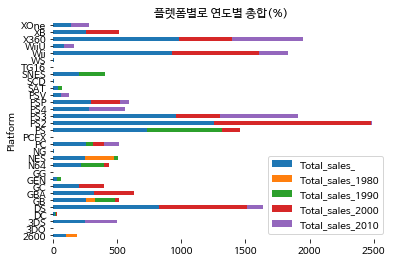

In [ ]:
plt.figure(figsize=(30,30))

ax = result.plot(kind='barh', stacked=True, title="플렛폼별로 연도별 총합(%)", rot=0)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    #ax.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)
plt.show()

In [ ]:
r_2=result2.set_index(keys='Platform').T
r_2

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Total_sales_1980,86.48,0.0,0.00,0.00,0.02,66.40,0.00,0.00,0.00,0.00,0.00,223.51,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
Total_sales_1990,0.00,0.1,0.00,8.54,0.00,159.03,0.00,0.00,28.35,0.04,180.71,27.54,1.44,49.96,0.03,586.88,0.00,0.00,0.00,0.00,0.00,33.59,1.86,200.04,0.16,0.46,0.00,0.00,0.00,0.00,0.0
Total_sales_2000,0.00,0.0,0.00,7.41,688.22,28.80,312.88,196.73,0.00,0.00,37.30,0.00,0.00,84.34,0.00,140.57,1227.47,347.08,0.00,227.30,0.00,0.00,0.00,0.00,0.00,0.96,676.95,0.00,412.62,251.57,0.0
Total_sales_2010,0.00,0.0,246.18,0.00,129.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,119.87,0.00,0.00,6.09,602.31,278.16,64.36,61.64,0.00,0.00,0.00,0.00,0.00,232.25,81.79,556.69,0.00,141.1


In [ ]:
r_2['NES'][0]

223.50999999999993

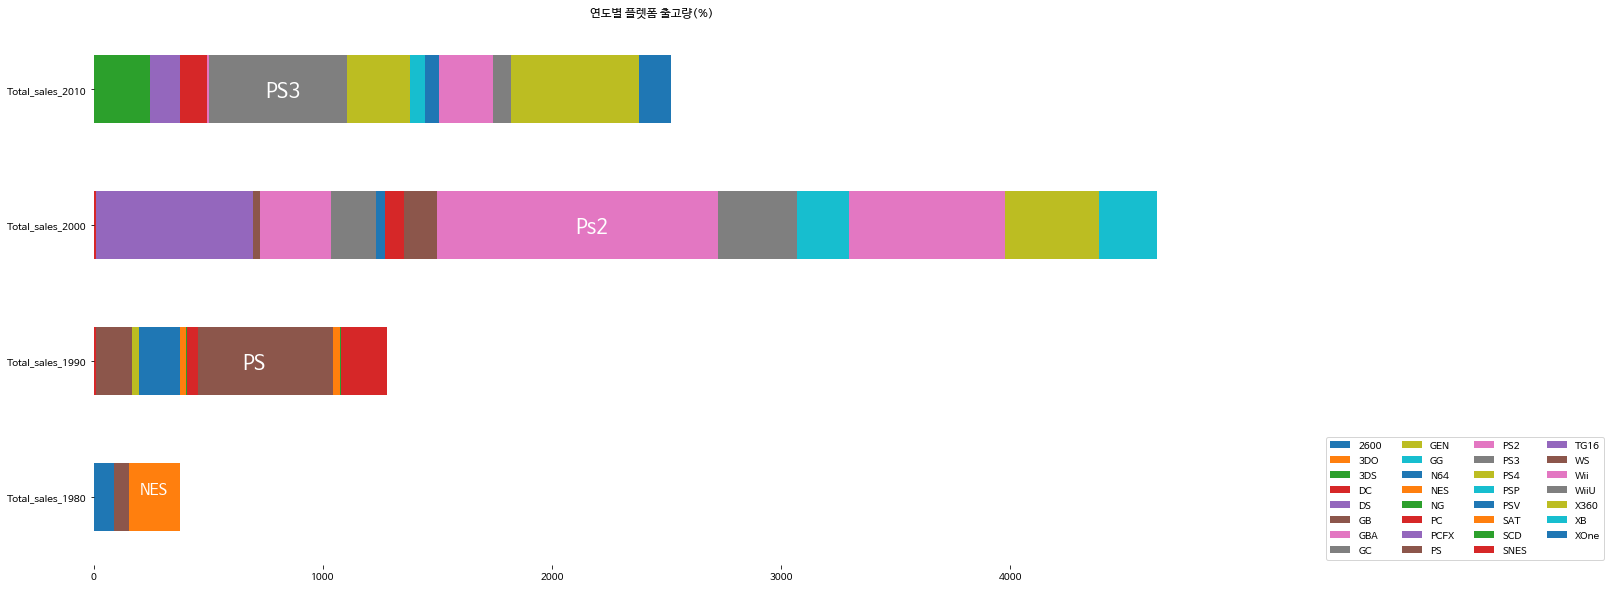

In [ ]:

ax = r_2.plot(kind='barh', stacked=True, title="연도별 플렛폼 출고량(%)", rot=0,figsize=(20,10))

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    #ax.annotate(bottom,xy=(left+width/2, bottom+height/2), ha='center', va='center)

plt.text(200,0.03,'NES',color= 'w',fontsize=15 )    
plt.text(650,0.95,'PS', color= 'w',fontsize=20 )
plt.text(2100,1.95,'Ps2', color='w',fontsize=20, )
plt.text(750,2.95,'PS3',color= 'w', fontsize=20)
plt.legend(loc='lower left', ncol=4, bbox_to_anchor=(1.1, 0))  
#plt.annotate 0.1
plt.sca(ax)
plt.box(False)

##최근 10년동안 플랫폼 출고량의 합

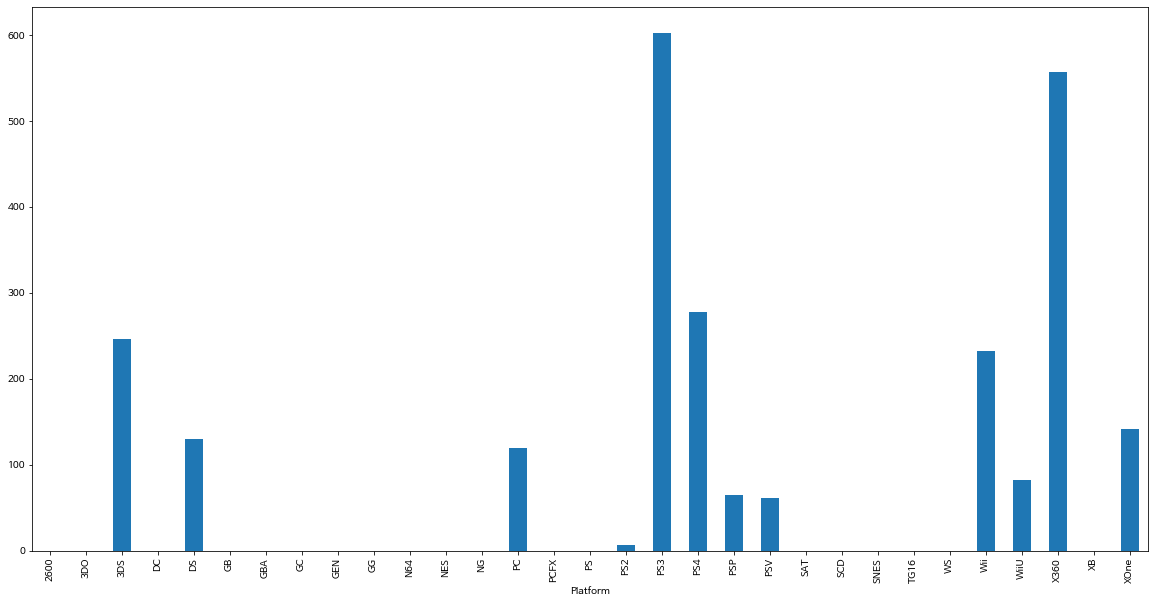

In [ ]:

result2_=result2.set_index('Platform')

result2_['Total_sales_2010'].plot.bar(figsize=(20,10))

#출고량 많은 게임 분석

##출고량이 많은 게임 

In [29]:
df["Name"].value_counts(dropna = False)

Need for Speed: Most Wanted               12
Madden NFL 07                              9
Ratatouille                                9
LEGO Marvel Super Heroes                   9
FIFA 14                                    9
                                          ..
Metal Slug 3                               1
The Cheetah Girls: Pop Star Sensations     1
Animal Planet: Emergency Vets              1
Dynasty Warriors 5: Xtreme Legends         1
Spore Galactic Adventures                  1
Name: Name, Length: 11493, dtype: int64

In [141]:
df_10=df.sort_values(by=['Total_sales'], axis=0, ascending = False).reset_index(drop=True).head(10)
df_10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [153]:
df_n=df.groupby(by=['Name'],as_index=False).sum().sort_values(by=['Total_sales'],ascending = False).reset_index(drop=True).head(10).drop(labels='Year', axis=1)

#df_10[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]=df_n
df_n['Rank']= df_n['Total_sales'].rank(ascending = False).astype(int)
#df_10=df_10.drop(labels='Total_sales', axis=1)
df_n

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales,Rank
0,Wii Sports,41.49,29.02,3.77,8.46,82.74,1
1,Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92,2
2,Super Mario Bros.,32.48,4.88,6.96,0.99,45.31,3
3,Tetris,26.17,2.95,6.03,0.69,35.84,4
4,Mario Kart Wii,15.85,12.88,3.79,3.31,35.83,5
5,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00,6
6,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38,7
7,Call of Duty: Black Ops,17.59,9.50,0.59,3.36,31.04,8
8,Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.84,9
9,New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01,10


In [151]:
data={'Name':['Wii Sports',	'Grand Theft Auto V',	'Super Mario Bros.',	'Tetris',	'Mario Kart Wii',	'Wii Sports Resort',	'Pokemon Red/Pokemon Blue',	'Call of Duty: Black Ops',	'Call of Duty: Modern Warfare 3',	'New Super Mario Bros.'],
      'Platform':['Will','PS3','NES','GB','Will','Will','GB','X360','X360','DS'],
      'Year':[2006,2013,1985,1989,2009,2009,1996,2010,2011,2006],
      'Genre':['Sports','Action',' Platform','Puzzle','Sports','Sports','Role-Playing','Shooter','Shooter','Platform'],
      'Publisher':['Nintendo','Action Take-Two Interactive', 'Nintendo','Nintendo','Nintendo','Nintendo','Nintendo','Shooter	Activision','Shooter	Activision','Nintendo']}

df_detail= pd.DataFrame(data)      

In [154]:
df_n=pd.merge(df_detail, df_n, how='left', on='Name')



In [155]:
df_n

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales,Rank
0,Wii Sports,Will,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,Grand Theft Auto V,PS3,2013,Action,Action Take-Two Interactive,23.46,23.04,1.39,8.03,55.92,2
2,Super Mario Bros.,NES,1985,Platform,Nintendo,32.48,4.88,6.96,0.99,45.31,3
3,Tetris,GB,1989,Puzzle,Nintendo,26.17,2.95,6.03,0.69,35.84,4
4,Mario Kart Wii,Will,2009,Sports,Nintendo,15.85,12.88,3.79,3.31,35.83,5
5,Wii Sports Resort,Will,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,6
6,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,7
7,Call of Duty: Black Ops,X360,2010,Shooter,Shooter\tActivision,17.59,9.50,0.59,3.36,31.04,8
8,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Shooter\tActivision,15.58,11.29,0.62,3.35,30.84,9
9,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,10


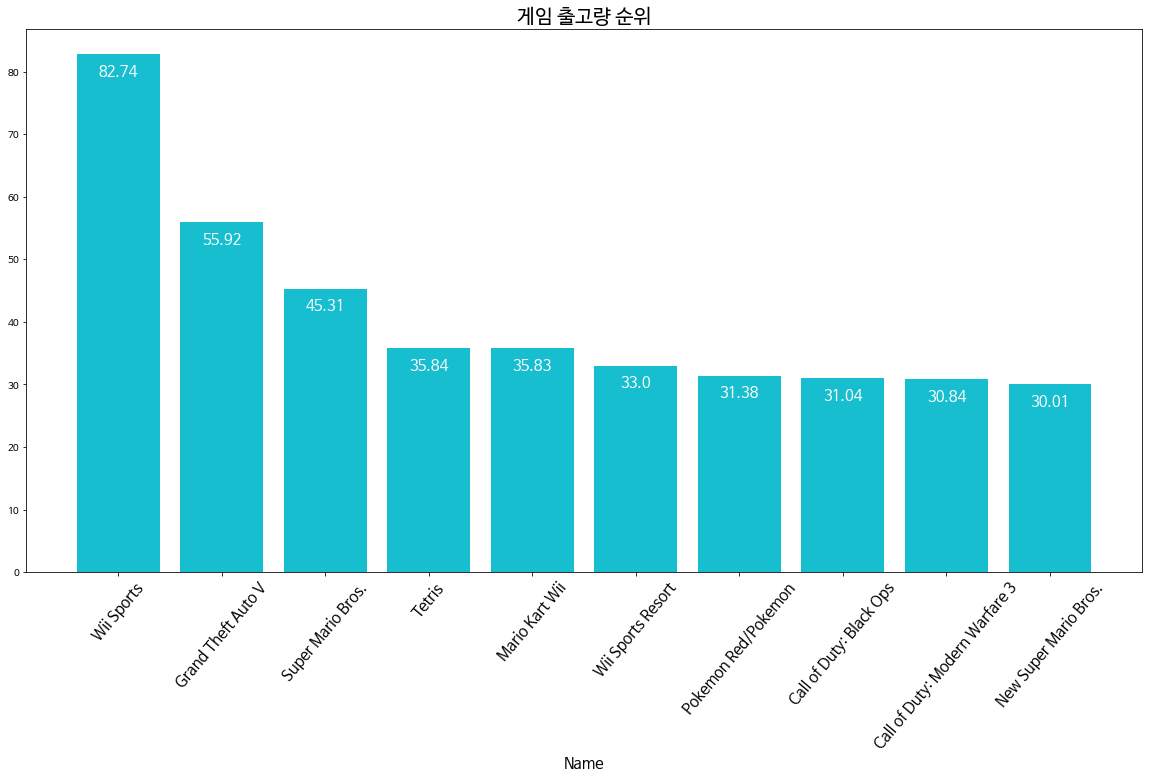

In [156]:
import matplotlib

plt.figure(figsize=(20,10))

Name= ['Wii Sports','Grand Theft Auto V',	'Super Mario Bros.','Tetris',	'Mario Kart Wii',	'Wii Sports Resort',	'Pokemon Red/Pokemon',	'Call of Duty: Black Ops',	'Call of Duty: Modern Warfare 3',	'New Super Mario Bros.']
xtick_label_position = list(range(len(Name)))

#df_10['Total_Sales'].plot.bar()

plt.xticks(xtick_label_position, Name,fontsize = '15',rotation = 50)

plt.bar(xtick_label_position, df_n.iloc[:,9], color='tab:cyan')

for i, v in enumerate(xtick_label_position):
    plt.text(v, df_n.iloc[:,9][i]-4, round(df_n.iloc[:,9][i],2),                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='w',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 


plt.title('게임 출고량 순위',fontsize=20) ## 타이틀 출력
plt.xlabel('Name',fontsize=15) ## x축 라벨 출력

#plt.xaxis(rotation = 90, fontsize = '15')

plt.show()

상위 10위 안에 드는 게임의 Publisher은 모두 닌텐도가 차지하고 있으며, 플렛폼은 Will이 5개로 50% 차지하고 있고 그외 NES 2개, GB 2개씩 차지하고 있다. 
장르는 다른 feasure보다 고르게 분포되어있으며, Platform 3개정도 있다는 것과 스포츠 2개만 있지만 둘다 4위안에 들었다.

이 게임들은 모두 2010년에 이전에 출시되었고 1980년것도 3개나 있다. 이 대부분 오랜 기간 많은 사랑을 받아온 게임들로 추측되니 이 게임들보다 훨씬 뛰어나게 못만들거면 비슷한 류는 피하는 것이 좋겠다.


##출고량 많은 장르


In [97]:
df_G=df.groupby(by=['Genre'],as_index=False).sum().sort_values(by=['Total_sales'], ascending = False).reset_index(drop=True).head(10)
df_G['Rank']= df_G['Total_sales'].rank(ascending = False).astype(int)
df_G

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales,Rank
0,Action,6509645,874.81,522.16,157.90,186.45,1741.32,1
1,Sports,4610619,680.52,376.48,135.37,134.67,1327.04,2
2,Shooter,2565579,581.92,313.05,38.28,102.65,1035.90,3
3,Role-Playing,2942353,319.54,183.58,344.95,56.96,905.03,4
4,Platform,1749333,446.44,201.61,130.65,51.53,830.23,5
5,Misc,3422377,408.05,212.36,105.27,74.04,799.72,6
6,Racing,2445913,357.19,237.10,56.40,77.10,727.79,7
7,Fighting,1673860,223.20,101.22,87.34,36.64,448.40,8
8,Simulation,1703571,182.96,113.35,63.70,31.48,391.49,9
9,Puzzle,1136973,123.35,50.73,56.87,12.52,243.47,10


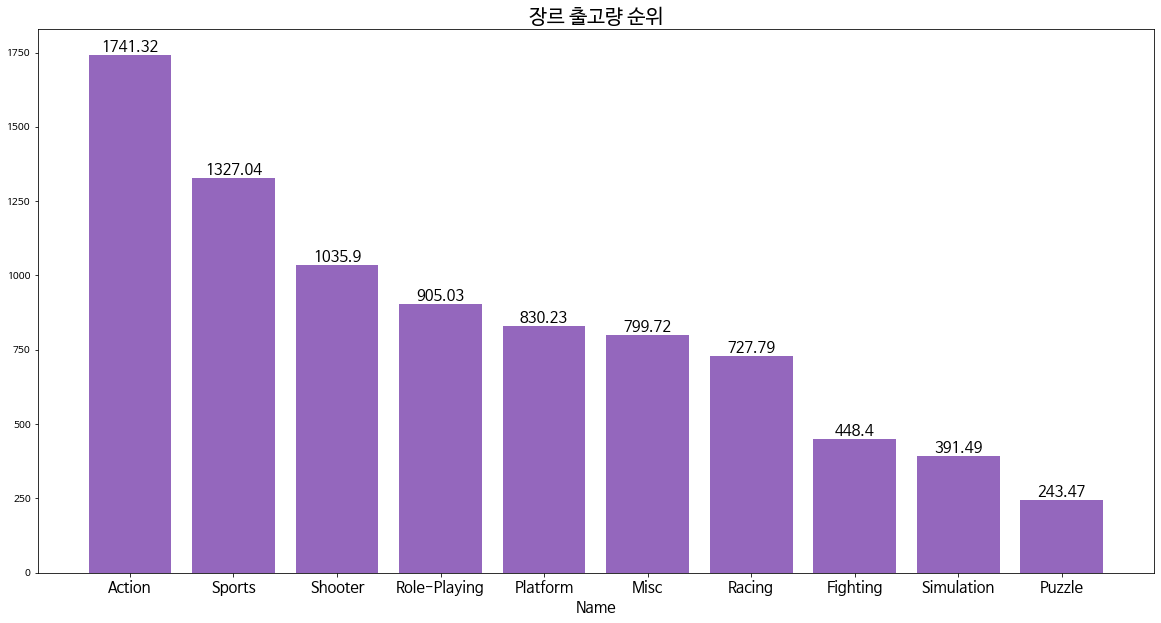

In [98]:
import matplotlib

plt.figure(figsize=(20,10))

Genre= ['Action',	'Sports',	'Shooter',	'Role-Playing',	'Platform',	'Misc',	'Racing',	'Fighting',	'Simulation',	'Puzzle']
xtick_label_position_3 = list(range(len(Genre)))

plt.xticks(xtick_label_position_3, Genre,fontsize = '15')
plt.bar(xtick_label_position_3, df_G.iloc[:,6], color='tab:purple')

for k, l in enumerate(xtick_label_position_3):
    plt.text(l, df_G.iloc[:,6][k],round(df_G.iloc[:,6][k],2),                # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
            
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 

plt.title('장르 출고량 순위',fontsize=20) ## 타이틀 출력
plt.xlabel('Name',fontsize=15) ## x축 라벨 출력

plt.show()

##출고량 많은 플랫폼

In [37]:
df_p=df.groupby(by=['Platform'],as_index=False).sum().sort_values(by=['Total_sales'], ascending = False).reset_index(drop=True).head(10)
df_p['Rank']= df_p['Total_sales'].rank(ascending = False).astype(int)
df_p

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales,Rank
0,PS2,4263750,583.84,339.29,139.20,193.44,1255.77,1
1,X360,2482205,601.05,280.58,12.43,85.54,979.60,2
2,PS3,2622109,392.26,343.71,79.99,141.93,957.89,3
3,Wii,2591562,507.71,268.38,69.35,80.61,926.05,4
4,DS,4283493,390.71,194.65,175.57,60.53,821.46,5
5,PS,2371627,336.51,213.60,139.82,40.91,730.84,6
6,GBA,1624604,187.54,75.25,47.33,7.73,317.85,7
7,PSP,2404440,108.99,68.25,76.79,42.19,296.22,8
8,PS4,677042,96.80,123.70,14.30,43.36,278.16,9
9,PC,1894273,93.28,139.68,0.17,24.86,257.99,10


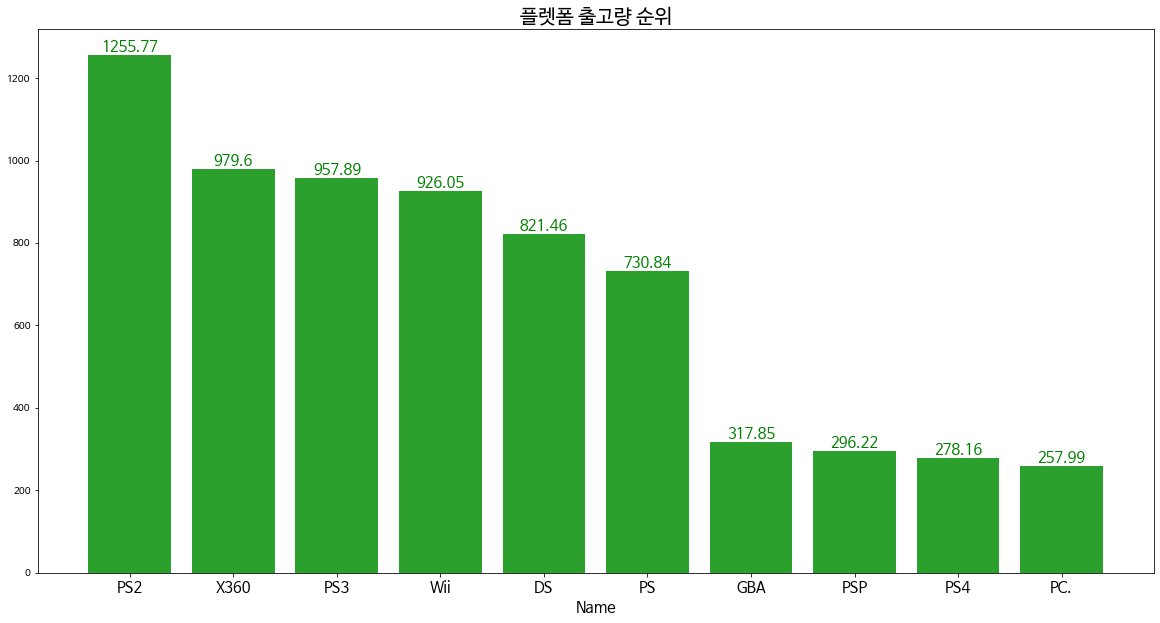

In [38]:
import matplotlib

plt.figure(figsize=(20,10))

Platform= ['PS2',	'X360',	'PS3',	'Wii',	'DS',	'PS',	'GBA',	'PSP',	'PS4',	'PC.']
xtick_label_position_2 = list(range(len(Platform)))

plt.xticks(xtick_label_position_2, Platform,fontsize = '15')
plt.bar(xtick_label_position_2, df_p.iloc[:,6], color='tab:green')

for j, w in enumerate(xtick_label_position_2):
    plt.text(w, df_p.iloc[:,6][j],round(df_p.iloc[:,6][j],2),                # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='g',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 

plt.title('플렛폼 출고량 순위',fontsize=20) ## 타이틀 출력
plt.xlabel('Name',fontsize=15) ## x축 라벨 출력

plt.show()

##각 지역을 중심으로

In [60]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

In [94]:
df_N=df.sort_values(by=['NA_Sales'],ascending = False).head(10).reset_index(drop=True)
df_N.style.background_gradient(cmap=cm,subset=['NA_Sales'])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.490000,29.020000,3.770000,8.460000,82.740000
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.080000,3.580000,6.810000,0.770000,40.240000
2,Duck Hunt,NES,1984,Shooter,Nintendo,26.930000,0.630000,0.280000,0.470000,28.310000
3,Tetris,GB,1989,Puzzle,Nintendo,23.200000,2.260000,4.220000,0.580000,30.260000
4,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.850000,12.880000,3.790000,3.310000,35.830000
5,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.750000,11.010000,3.280000,2.960000,33.000000
6,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.970000,4.940000,0.240000,1.670000,21.820000
7,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.590000,7.060000,4.700000,2.260000,28.610000
8,Wii Play,Wii,2006,Misc,Nintendo,14.030000,9.200000,2.930000,2.850000,29.010000
9,Super Mario World,SNES,1990,Platform,Nintendo,12.780000,3.750000,3.540000,0.550000,20.620000


In [96]:
df_e=df.sort_values(by=['EU_Sales'],ascending = False).head(10).reset_index(drop=True)
df_e.style.background_gradient(cmap=cm,subset=['EU_Sales'])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.490000,29.020000,3.770000,8.460000,82.740000
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.850000,12.880000,3.790000,3.310000,35.830000
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.750000,11.010000,3.280000,2.960000,33.000000
3,Nintendogs,DS,2005,Simulation,Nintendo,9.070000,11.000000,1.930000,2.750000,24.750000
4,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.010000,9.270000,0.970000,4.140000,21.390000
5,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.750000,9.260000,4.160000,2.050000,20.220000
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.380000,9.230000,6.500000,2.900000,30.010000
7,Wii Play,Wii,2006,Misc,Nintendo,14.030000,9.200000,2.930000,2.850000,29.010000
8,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.270000,8.890000,10.220000,1.000000,31.380000
9,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.090000,8.590000,2.530000,1.790000,22.000000


In [93]:
df_j=df.sort_values(by=['JP_Sales'],ascending = False).head(10).reset_index(drop=True)

df_j.style.background_gradient(cmap=cm,subset=['JP_Sales'])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.270000,8.890000,10.220000,1.000000,31.380000
1,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.000000,6.180000,7.200000,0.710000,23.090000
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.080000,3.580000,6.810000,0.770000,40.240000
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.380000,9.230000,6.500000,2.900000,30.010000
4,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.420000,4.520000,6.040000,1.370000,18.350000
5,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.570000,3.280000,5.650000,0.820000,15.320000
6,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.060000,3.900000,5.380000,0.500000,15.840000
7,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.550000,3.520000,5.330000,0.880000,12.280000
8,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.440000,5.360000,5.320000,1.180000,15.300000
9,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.000000,0.000000,4.870000,0.000000,4.870000


#결론

 **PS3(플레이스테이션)을 기반으로 한 액션 장르의 게임을 출시하는 것이 적절하다**

